In [1]:
import pandas as pd
df = pd.read_csv('problem3.csv')
df.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2012-11-26 00:00:00,208.0,354.0,926.0,1.0,208.0,NaN,0.0,0.0,57.0
1,2012-11-26 01:00:00,207.0,354.0,927.0,2.0,207.0,NaN,0.0,0.0,76.0
2,2012-11-26 02:00:00,208.0,353.0,927.0,3.0,208.0,NaN,0.0,0.0,100.0
3,2012-11-26 03:00:00,208.0,350.0,927.0,4.0,209.0,NaN,0.0,0.0,111.0
4,2012-11-26 04:00:00,209.0,352.0,927.0,5.0,209.0,NaN,0.0,0.0,131.0


데이터 셋 분할 및 결과 검증

- 데이터셋 7:3 분할
- 데이터 전처리 및 예측 모델 생성
- 모델 성능 검증 : RMSE, R-square, 정확도로 구하여라.
- 정확도 : 실제값 > 예측값인 경우 (1-예측값/실제값), 실제값 < 예측값인 경우 (1- 실제값/예측값) 으로 하고 이것들을 평균낸 후 1에서 뺀 값으로 한다.
- 최종 결과 : 소수점 3째자리 반올림

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44904 entries, 0 to 44903
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TIMESTAMP      44904 non-null  object 
 1   BIOGAS         44904 non-null  float64
 2   BIOMASS        44904 non-null  float64
 3   GEOTHERMAL     44904 non-null  float64
 4   Hour           44904 non-null  float64
 5   SMALL HYDRO    44904 non-null  float64
 6   SOLAR          0 non-null      float64
 7   SOLAR PV       44904 non-null  float64
 8   SOLAR THERMAL  44904 non-null  float64
 9   WIND TOTAL     44904 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.4+ MB


In [3]:
df.isna().sum()

TIMESTAMP            0
BIOGAS               0
BIOMASS              0
GEOTHERMAL           0
Hour                 0
SMALL HYDRO          0
SOLAR            44904
SOLAR PV             0
SOLAR THERMAL        0
WIND TOTAL           0
dtype: int64

SOLAR 컬럼에만 결측치가 존재하는 것을 확인(모든 컬럼 결측치)

-> SOLAR 컬럼 삭제

시계열 분석이 아닌 회귀분석을 진행하기 위해 TIMESTAMP 컬럼 또한 삭제

In [8]:
df = df.drop(columns=['TIMESTAMP','SOLAR'])
df.head()

,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,208.0,354.0,926.0,1.0,208.0,0.0,0.0,57.0
1,207.0,354.0,927.0,2.0,207.0,0.0,0.0,76.0
2,208.0,353.0,927.0,3.0,208.0,0.0,0.0,100.0
3,208.0,350.0,927.0,4.0,209.0,0.0,0.0,111.0
4,209.0,352.0,927.0,5.0,209.0,0.0,0.0,131.0


In [9]:
df.describe()

,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR PV,SOLAR THERMAL,WIND TOTAL
count,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000
mean,185.700405,283.616604,945.298882,12.500000,284.281200,1647.195706,117.254521,1478.654262
std,19.947924,59.600559,89.507178,6.922264,132.114683,2390.975782,188.736880,1135.239178
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,172.000000,237.000000,883.000000,6.750000,176.000000,0.000000,0.000000,413.750000
50%,187.000000,283.000000,928.000000,12.500000,272.000000,3.000000,0.000000,1301.000000
75%,199.000000,332.000000,1011.000000,18.250000,374.000000,2955.000000,213.000000,2374.000000
max,248.000000,423.000000,1230.000000,24.000000,678.000000,9373.000000,725.000000,4914.000000


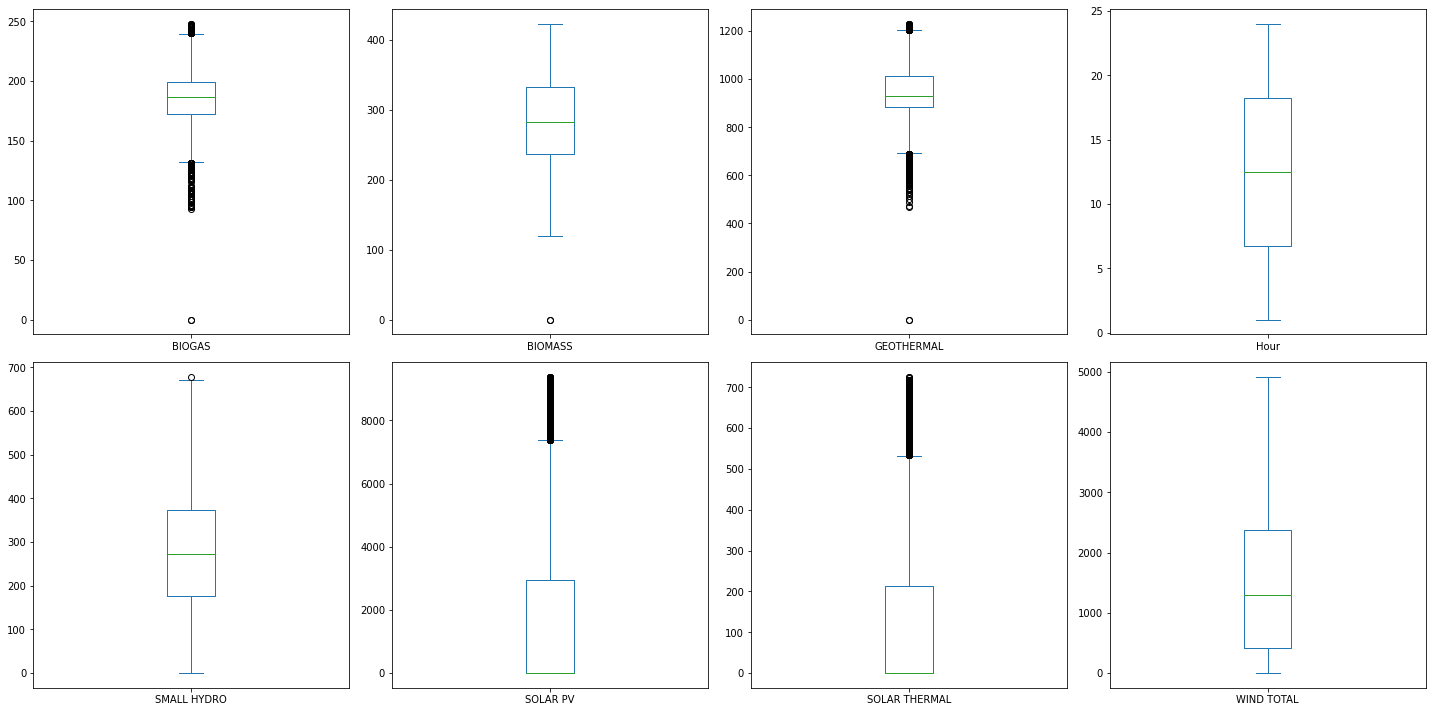

In [10]:
#이상치 확인
import matplotlib.pyplot as plt

df.plot(kind='box',subplots=True,layout=(2,4),figsize=(20,10))
plt.tight_layout()
plt.show()

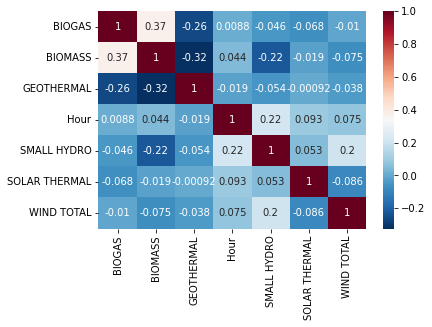

In [11]:
import seaborn as sns

df_corr = df.drop(columns='SOLAR PV').corr(method='pearson')
sns.heatmap(df_corr,xticklabels=df_corr.columns, yticklabels=df_corr.columns,
            cmap='RdBu_r',annot=True)
plt.show()

변수들 간의 상관관계는 존재하지 않는 것으로 확인

In [12]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = 'SOLAR PV')
y = df['SOLAR PV']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(31432, 7) (13472, 7)
(31432,) (13472,)


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc_train = sc.fit_transform(x_train)
x_sc_test = sc.transform(x_test)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

rf = RandomForestRegressor()
rf.fit(x_sc_train,y_train)
pred = rf.predict(x_test)

results = pd.DataFrame()
results['y_test'] = y_test
results['pred'] = pred
results.head()


C:\Users\suhye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,y_test,pred
6745,0.0,1505.75
40238,8566.0,3520.37
9173,0.0,1505.75
2351,0.0,1505.75
36941,0.0,1505.75


In [21]:
accuracy_list = []
for i, j in zip(results['y_test'],results['pred']):
    if i==0 or j == 0:
        ac = 0.5
        accuracy_list.append(ac)
         
    elif i > j:
        ac = 1 - j/i
        accuracy_list.append(ac)
        
    else:
        ac = 1 - i/j
        accuracy_list.append(ac)

In [22]:
results['accuarcy_score'] = accuracy_list
results

,y_test,pred,accuarcy_score
6745,0.0,1505.75,0.500000
40238,8566.0,3520.37,0.589030
9173,0.0,1505.75,0.500000
2351,0.0,1505.75,0.500000
36941,0.0,1505.75,0.500000
...,...,...,...
33327,3764.0,3520.37,0.064726
10076,0.0,1505.75,0.500000
2919,1080.0,3520.37,0.693214
23740,0.0,1505.75,0.500000


In [27]:
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
ac_score = results['accuarcy_score'].mean()

print("RMSE\t{}".format(round(mse,3)))
print('Accuracy score\t{}'.format(round(ac_score,3)))

RMSE	3800610.195
Accuracy score	0.482
